In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Circle, Rectangle
from matplotlib.animation import FuncAnimation
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15,
    'lines.linewidth': 2,
    'xtick.labelsize': 'small', 'ytick.labelsize': 'small',
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 200,
})

from pathlib import Path
import numpy as np
import torch
from jarvis.utils import tqdm

rng = np.random.default_rng()
FIG_PATH = Path('../figures')

# Find projection direction for eccentricity

In [2]:
xs, ys, eccs = [], [], []
freq = 64
for session_id in ['07317162', '48834689']:
    saved = torch.load('../cache/rfs.center_{}_[{:g}Hz].pt'.format(session_id, freq))
    xs.append(saved['xs'])
    ys.append(saved['ys'])
    eccs.append(saved['eccs'])
xs = np.concatenate(xs)
ys = np.concatenate(ys)
eccs = np.concatenate(eccs)

In [3]:
w, *_ = np.linalg.lstsq(np.stack([xs, ys, np.ones(len(eccs))], axis=1), eccs, rcond=None)
n_vec = np.array([w[0], w[1]])
n_vec /= (n_vec**2).sum()**0.5
wx, wy = n_vec

print('Direction {:.1f} deg'.format(np.arctan2(wy, wx)/np.pi*180))

Direction 154.5 deg


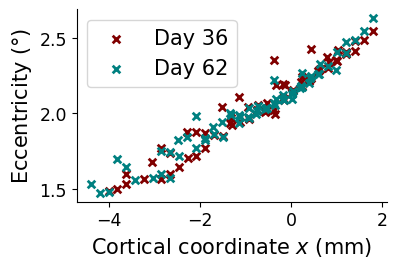

In [4]:
fig, ax = plt.subplots(figsize=(4, 2.5))
for session_id, color in zip(['07317162', '48834689'], ['maroon', 'teal']):
    saved = torch.load('../cache/rfs.center_{}_[{:g}Hz].pt'.format(session_id, freq))
    ax.scatter(wx*saved['xs']+wy*saved['ys'], saved['eccs'], s=30, marker='x', c=color)
ax.set_xlabel('Cortical coordinate $x$ (mm)')
ax.set_ylabel(r'Eccentricity ($\degree$)')
ax.set_yticks([1.5, 2, 2.5])
ax.legend(['Day 36', 'Day 62'])
fig.savefig(FIG_PATH/'retinotopy.stability.ecc.svg')

plt.show()

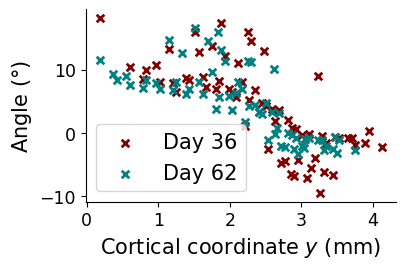

In [5]:
fig, ax = plt.subplots(figsize=(4, 2.5))
for session_id, color in zip(['07317162', '48834689'], ['maroon', 'teal']):
    saved = torch.load('../cache/rfs.center_{}_[{:g}Hz].pt'.format(session_id, freq))
    ax.scatter(wy*saved['xs']-wx*saved['ys'], saved['angs'], s=30, marker='x', c=color)
ax.set_xlabel('Cortical coordinate $y$ (mm)')
ax.set_ylabel(r'Angle ($\degree$)')
ax.set_yticks([-10, 0, 10])
ax.legend(['Day 36', 'Day 62'])
fig.savefig(FIG_PATH/'retinotopy.stability.ang.svg')

plt.show()